In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import timeit

## 1. Mone Carlo Simulation - Calculate $\pi$

We sample $N$ random points $\left( x, y \right)$ in a $2D$ square $\left[-1,1\right] \times \left[-1,1\right]$ and count how many of them inside the unit circle $x^2 + y^2 < 1$

We then calculate $\frac{N_{circle}}{N} \approx \frac{{Area}_{circle}}{{Area}_{square}}$ and use this to approximate $\pi$

In [2]:
def monte_carlo_calculate_pi(N = 10**5, seed = 16456):
    np.random.seed(seed) #so all calculations will be the same
    N_circle = 0
    
    for i in range(N):
        x = np.random.uniform(low = -1., high = 1.)
        y = np.random.uniform(low = -1., high = 1.)
        if x*x + y*y <= 1.:
            N_circle += 1
    
    approximate_pi = 4 * N_circle / N
    return approximate_pi
    
pi = monte_carlo_calculate_pi()
print(f'Monte Carlo approximation to pi is {pi:5.6}')

Monte Carlo approximation to pi is 3.14516


The same as the previous method but this time we also draw all the points to show the sample visually

Monte Carlo approximation to pi is 3.076


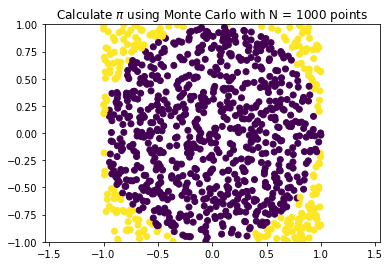

3.076

In [3]:
def monte_carlo_calculate_pi_and_draw(N = 10**3, seed = 16456):
    np.random.seed(seed) #so all calculations will be the same
    N_circle = 0
    
    #the arrays to save all the points (only for plotting!)
    points_x = np.ndarray(N) 
    points_y = np.ndarray(N)
    points_color = np.ndarray(N)
    
    for i in range(N):
        x, y = np.random.uniform(low = -1., high = 1., size = 2)
        points_x[i] = x
        points_y[i] = y
        
        if x**2 + y**2 <= 1.:
            N_circle += 1
            points_color[i] = 1
        else:
            points_color[i] = 2

    approximate_pi = 4 * N_circle / N
    print(f'Monte Carlo approximation to pi is {approximate_pi:5.6}')
    
    #plot
    plt.figure()
    plt.scatter(x = points_x, y = points_y, c = points_color)
    plt.title(f'Calculate $\\pi$ using Monte Carlo with N = {N} points')
    plt.axis('equal')
    plt.xlim([-1.,1.])
    plt.ylim([-1.,1.])
    #plt.savefig(f'figs/Pi_calculation_Scatter_N{N}.pdf', dpi=200, bbox_inches = 'tight') # Save the plot
    plt.show()
    
    return approximate_pi

monte_carlo_calculate_pi_and_draw()

Again, the same as the previous methods, but here we use numpy techniques to make a faster code

In [4]:
def monte_carlo_calculate_pi_fast(N = 10**5, seed = 16456):
    np.random.seed(seed) #so all calculations will be the same
    
    points = np.random.uniform(low = -1., high = 1., size = (N,2))
    R = points[:,0]*points[:,0] + points[:,1]*points[:,1]
    N_circle = np.sum(R < 1.)
    
    approximate_pi = 4 * N_circle / N

    return approximate_pi

pi = monte_carlo_calculate_pi_fast()
print(f'Monte Carlo approximation to pi is {pi:5.6}')

Monte Carlo approximation to pi is 3.14516


In [5]:
#see which function is faster
%timeit monte_carlo_calculate_pi()
%timeit monte_carlo_calculate_pi_fast()

363 ms ± 3.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.45 ms ± 71.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Here we check the convergence of the Monte Carlo code by running it with a different seed and $N$ and plotting the results on the same graph

It is clear that the results are all clustering together to the real value of $\pi$ as $N\rightarrow \infty$

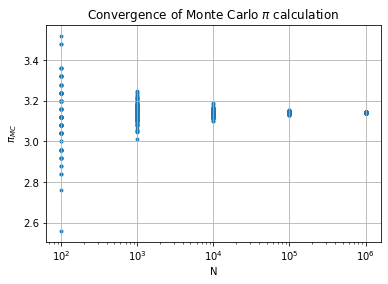

In [6]:
N_scatter =  [10**i for i in range(2,7)]
M = 100 #how many runs to do for each N

pi_results = np.ndarray(shape = (len(N_scatter), M)) #save all the results from the Monte Carlo calculations

for i in range(len(N_scatter)):
    N = N_scatter[i]
    for j in range(M):
        pi_results[i,j] = monte_carlo_calculate_pi_fast(N, seed = i + j) #the seed is needed to create different results, the value is arbitrary


#plot
pi = pi_results.flatten()
N_vals = [N for N in N_scatter for j in range(M)]
plt.figure()
plt.scatter(x = N_vals, y = pi, s=8.)
plt.xscale('log')
plt.title(f'Convergence of Monte Carlo $\\pi$ calculation')
plt.xlabel('N')
plt.ylabel('$\\pi_{MC}$')
plt.grid()
#
plt.show()plt.savefig(f'figs/convergence_monte_carlo_pi.pdf', dpi=200, bbox_inches = 'tight') # Save the plot

## 2. Monte Carlo Integration

To calculate $\int^{a}_{b} f\left(x\right) dx$ using Monte Carlo code we take $N$ random samples from $\left[a,b\right]$ and calcualte:

$\int^{a}_{b} f\left(x\right) \approx \left(b-a\right) \cdot \frac{1}{N} \sum_{i=1}^{N}{f\left(x_i\right)}$

In [7]:
def monte_carlo_integration(f, a, b, N = 10**4, seed = 16456):
    np.random.seed(seed) #so all calculations will be the same
    sum_f = 0.
    
    for i in range(N):
        x = np.random.uniform(low = a, high = b)
        fx = f(x)
        sum_f += fx

    return sum_f * (b-a) / N

The same as the previous method, but runs faster using numpy techniques

In [8]:
def monte_carlo_integration_fast(f, a, b, N = 10**4, seed = 16456):
    np.random.seed(seed) #so all calculations will be the same
    x = np.random.uniform(low = a, high = b, size = N)
    sum_f = np.sum(f(x))

    return sum_f * (b-a) / N

As an example we calculate $\int^{1}_{0}{\frac{{\left(x-x^2\right)}^4}{1+x^2}} = \frac{22}{7} - \pi$ and compare to the Monte Carlo algorithm

In [9]:
def f(x):
    return (x - x*x)**4 / (1 + x*x)

real_result = 22 / 7 - np.pi
mc_result = monte_carlo_integration(f, 0., 1., N=10**5)
print(f'The analytic result is {real_result}')
print(f'The result using the Monte Carlo integration is {mc_result}')

The analytic result is 0.0012644892673496777
The result using the Monte Carlo integration is 0.0012613423434346233


In [10]:
#see which function is faster
%timeit monte_carlo_integration(f, 0., 1.)
%timeit monte_carlo_integration_fast(f, 0., 1.)

21.6 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
384 µs ± 6.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Here we check the convergence of the Monte Carlo code by running it with a different seed and $N$ and plotting the results on the same graph

It is clear that the results are all clustering together to the real value of the integral as $N\rightarrow \infty$

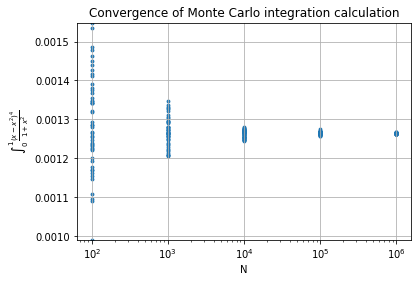

In [11]:
N_scatter =  [10**i for i in range(2,7)]
M = 50 #how many runs to do for each N

integral_results = np.ndarray(shape = (len(N_scatter), M)) #save all the results from the Monte Carlo calculations

for i in range(len(N_scatter)):
    N = N_scatter[i]
    for j in range(M):
        integral_results[i,j] = monte_carlo_integration_fast(f, 0., 1., N, seed = i + j) #the seed is needed to create different results, it's value is arbitrary

#plot
integral = integral_results.flatten()
N_vals = [N for N in N_scatter for j in range(M)]
plt.figure()
plt.scatter(x = N_vals, y = integral, s=8.)
plt.xscale('log')
plt.title(f'Convergence of Monte Carlo integration calculation')
plt.ylim([min(integral), max(integral)])
plt.xlabel('N')
plt.ylabel(r'$\int^{1}_{0} \frac{(x-x^2)^4}{1+x^2} $')
plt.grid()
#plt.savefig(f'figs/convergence_monte_carlo_integration.pdf', dpi=200, bbox_inches = 'tight') # Save the plot
plt.show()

## 3. Significant Digits and Errors

You can use python to print only acertain number of significant digits of some number using 'f-strings'

You can read more about how to show floating numbers here: https://docs.python.org/3/library/string.html#format-specification-mini-language

In [12]:
x = 3648723523.345347563
print(f"Rounded to 2 digits, x = {x:.2}")
print(f"Rounded to 5 digits, x = {x:.5}")
print(f"Rounded to 9 digits, x = {x:.9}")

Rounded to 2 digits, x = 3.6e+09
Rounded to 5 digits, x = 3.6487e+09
Rounded to 9 digits, x = 3.64872352e+09


Example of calculating the mean and error of some calculation

We sample the speed of sound ($343 \frac{m}{s}$) assuming a standard deviation of $\sigma = 15 \frac{m}{s}$ because of noise

In [13]:
np.random.seed(1234) #so all calculations will be the same
N = 20
data = np.random.normal(loc=343, scale=15, size=N) # the toy data from experiment

# option 1
mu = np.sum(data) / N
sigma = np.sqrt( np.sum((data-mu)**2) / (N-1) )
s = sigma / np.sqrt(N)

# alternative option
# mu = np.mean(data)
# sigma = np.std(data)
# s = stats.sem(data)

print(f"Real values mu = {343}, sigma = {15}")
print(f"Results mu = {mu:.3}, sigma = {sigma:.2}, error = {s:.1}")

Real values mu = 343, sigma = 15
Results mu = 3.43e+02, sigma = 1.7e+01, error = 4e+00


Now we can add a standard error to the integral calculation

In [14]:
def monte_carlo_integration_with_error(f, a, b, N = 10**4, seed = 16456):
    np.random.seed(seed) #so all calculations will be the same
    
    sample_f = []
    
    for i in range(N):
        x = np.random.uniform(low = a, high = b)
        sample_f.append(f(x) * (b-a))

    mean = np.mean(sample_f)
    error = stats.sem(sample_f)

    return mean, error

In [15]:
def f(x):
    return (x - x*x)**4 / (1 + x*x)

real_result = 22 / 7 - np.pi
mc_result, mc_error = monte_carlo_integration_with_error(f, 0., 1., N=10**5)
print(f'The analytic result is {real_result:.4}')
print(f'The result using the MC integration is {mc_result:.4} ± {mc_error:.1}')

The analytic result is 0.001264
The result using the MC integration is 0.001261 ± 4e-06


## 4. Convergence


Here we check the convergence of the Monte Carlo Integration code by running it with a different $N$ and plotting the $s_N$ as a function of $N$ graph

ValueError: x and y must be the same size

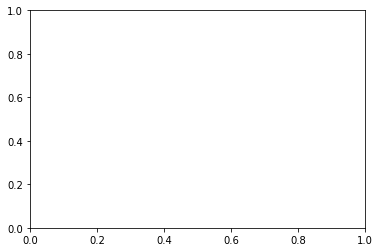

In [16]:
N_scatter =  [10**i for i in range(2,7)]

error_results = np.ndarray(shape = len(N_scatter)) #save all the results from the Monte Carlo calculations

for i in range(len(N_scatter)):
    N = N_scatter[i]
    _, error_results[i] = monte_carlo_integration_with_error(f, 0., 1., N)

#plot
plt.figure()
plt.scatter(x = N_scatter, y = error_results[i], s=8.)
plt.xscale('log')
plt.title(f'Convergence of Monte Carlo integration calculation')
plt.ylim([min(integral), max(integral)])
plt.xlabel('N')
plt.ylabel(r'$s_N$')
plt.grid()
#plt.savefig(f'figs/monte_carlo_integartion_error.pdf', dpi=200, bbox_inches = 'tight') # Save the plot
plt.show()